Importing the Libraries

In [1]:
import sys
sys.path.append('../utils')
import warnings
warnings.filterwarnings('ignore')

import os
import time 
import copy 
import re

from sklearn import datasets
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd 
import numpy as np 

import model_functions
import model_utils
import plotting_utils
import scoring_utils

Load in Sample Data

In [2]:
housing_prices = datasets.load_boston()
X = housing_prices.data
y = housing_prices.target

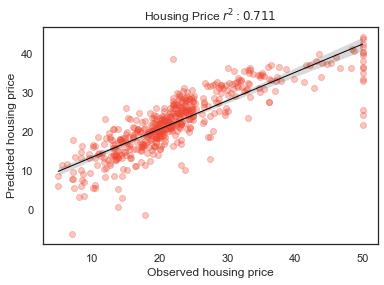

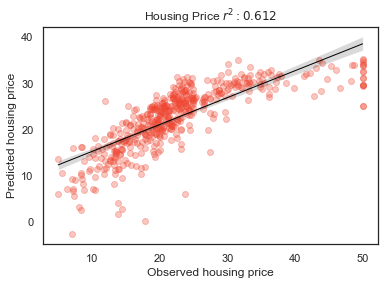

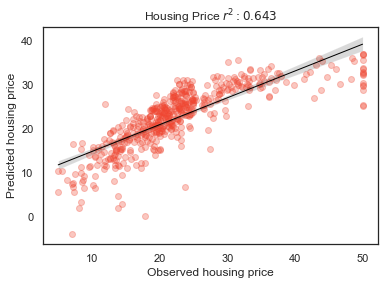

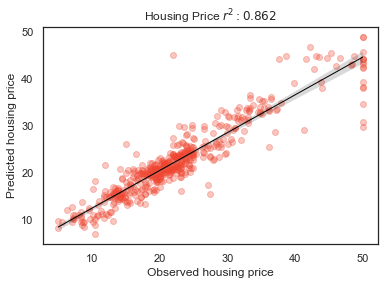

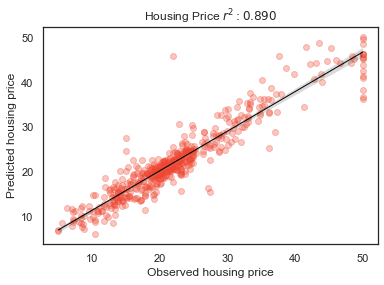

In [8]:
model_types = ['ridge', 'lasso', 'elastic_net', 'random_forest', 'xgboost']
for _ in model_types:
    model = model_utils.get_model(_)
    param_grid = model_utils.get_param_grid(_)
    cv, nested_scores, y, y_pred = model_utils.nested_cross_validation(model, X, y, param_grid)
    model_utils.plot_cross_val_results(y, y_pred, 'Housing Price', nested_scores)
